<a href="https://colab.research.google.com/github/numaaaann/machine-learning/blob/main/handwrittendigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
model = tf.keras.models.Sequential()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

model.fit(x_train, y_train, epochs=3)

loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)
model.save('digits.model.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9737 - loss: 0.2756
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9936 - loss: 0.0311
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9936 - loss: 0.0295
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9946 - loss: 0.0263
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9947 - loss: 0.0269
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9941 - loss: 0.0283
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.1578
0.9753999710083008
0.12782776355743408


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


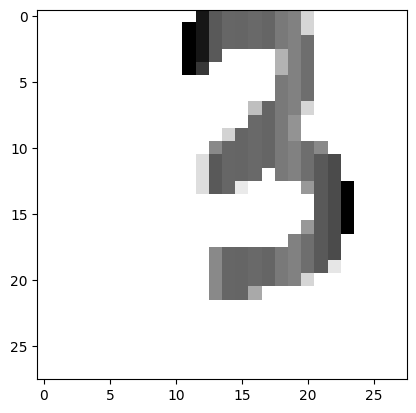

The result is probably: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


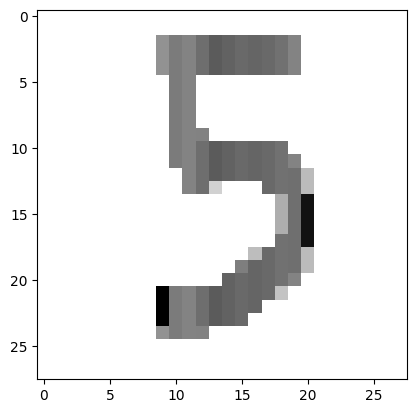

The result is probably: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


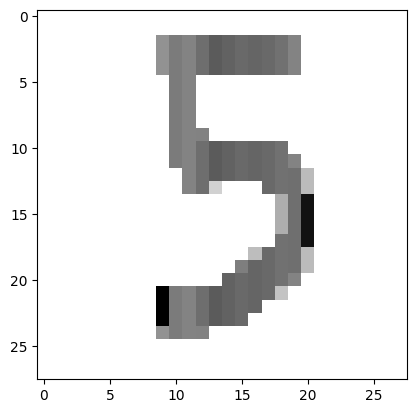

The result is probably: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


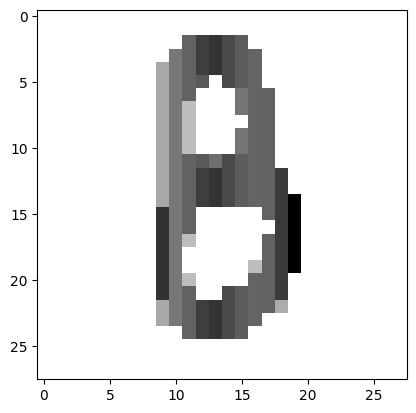

The result is probably: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


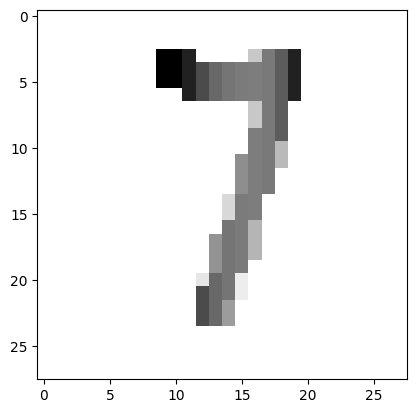

The result is probably: 2


In [ ]:
for x in range(1,6):
    img = cv.imread(f'{x}.png')
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convert to grayscale
    img = cv.resize(img, (28, 28)) # Resize to 28x28
    img = np.invert(np.array([img])) # Invert and add batch dimension
    img = tf.keras.utils.normalize(img, axis=1) # Normalize the image
    prediction = model.predict(img)
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    print(f'The result is probably: {np.argmax(prediction)}')

# New Section